In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [2]:
time = np.arange(0,300,1)

In [5]:
heart_rate = np.random.normal(75,3,len(time))

In [7]:
spO2 = np.random.normal(98,1,len(time))

In [9]:
data = pd.DataFrame({"time": time,"heart_rate":heart_rate,"spO2":spO2})

In [10]:
data.to_csv("Heart_csv",index=False)

In [11]:
data

,time,heart_rate,spO2
0,0,75.675720,96.981728
1,1,72.938212,98.731464
2,2,73.111604,97.810347
3,3,77.328486,97.989163
4,4,75.019959,98.657053
...,...,...,...
295,295,73.565520,96.637855
296,296,77.000735,99.157687
297,297,77.354160,98.884349
298,298,70.703135,98.160855


In [12]:
data.head()

,time,heart_rate,spO2
0,0,75.675720,96.981728
1,1,72.938212,98.731464
2,2,73.111604,97.810347
3,3,77.328486,97.989163
4,4,75.019959,98.657053


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(data[["heart_rate","spO2"]])



In [15]:
scaler_data

array([[0.54537259, 0.26142947],
       [0.39070492, 0.6102402 ],
       [0.40050145, 0.42661504],
       [0.63875298, 0.46226218],
       [0.50832248, 0.59540638],
       [0.85983882, 0.26108147],
       [0.49075593, 0.38954427],
       [0.56990431, 0.28891631],
       [0.71828419, 0.62325842],
       [0.0580078 , 0.64726118],
       [0.58661378, 0.69814197],
       [0.52891525, 0.39495703],
       [0.63643279, 0.47726638],
       [0.45833766, 0.57705733],
       [0.55631859, 0.27506866],
       [0.        , 0.72608031],
       [0.3065458 , 0.35827092],
       [0.71206307, 0.36713393],
       [0.31768717, 0.78798766],
       [0.7091088 , 0.1955987 ],
       [0.33173906, 0.26338481],
       [0.5843415 , 0.1262208 ],
       [0.5136776 , 0.65583598],
       [0.31457657, 0.60724857],
       [0.44351643, 0.46652384],
       [0.61905859, 0.28239439],
       [0.57002698, 0.55229665],
       [0.18007703, 0.45679396],
       [0.27005429, 0.10700095],
       [0.42873433, 0.61402158],
       [0.

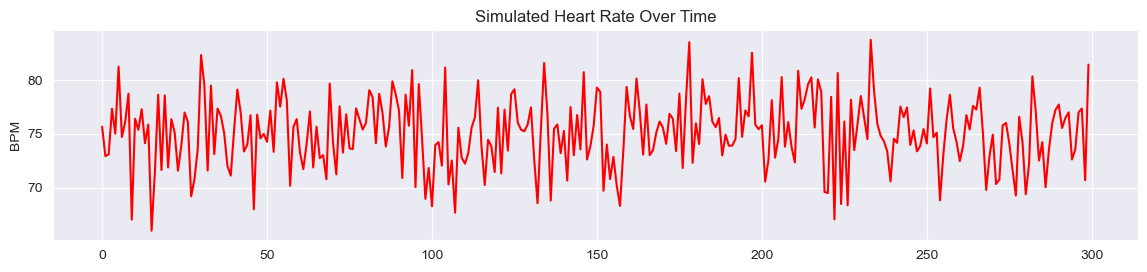

In [16]:
plt.figure(figsize=(14, 6))

# Plot heart rate
plt.subplot(2, 1, 1)
plt.plot(data['time'], data['heart_rate'], color='red')
plt.title('Simulated Heart Rate Over Time')
plt.ylabel('BPM')
plt.grid(True)

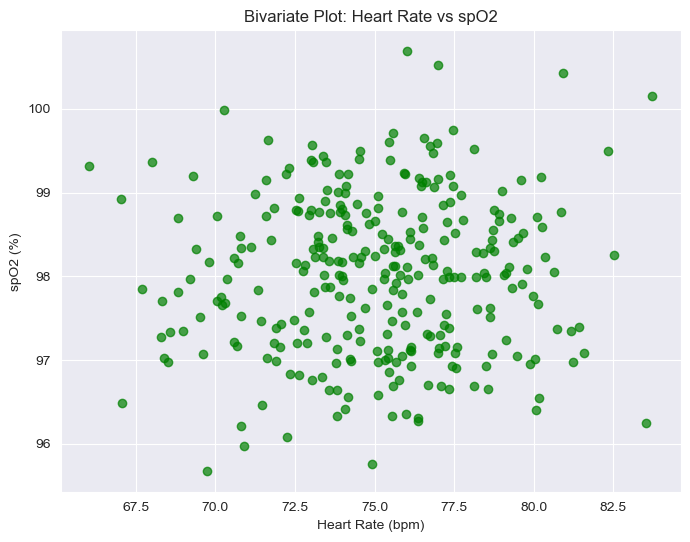

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(data['heart_rate'], data['spO2'], alpha=0.7, c='green')
plt.title('Bivariate Plot: Heart Rate vs spO2')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('spO2 (%)')
plt.grid(True)
plt.show()

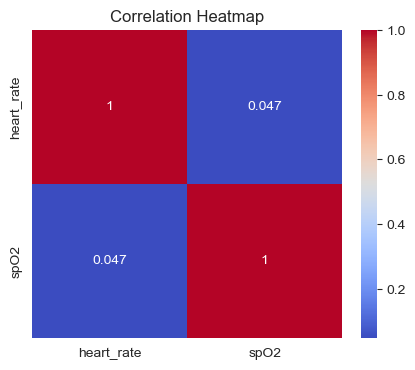

In [21]:
corr_matrix = data[['heart_rate', 'spO2']].corr()

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
def create_sequences(data,window_size = 20):
    sequences = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
    return np.array(sequences)

In [24]:
X = create_sequences(scaler_data)
print(f"Shape of input data: {X.shape}")


Shape of input data: (280, 20, 2)


In [26]:
!pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 1.4 MB/s eta 0:04:28
   ---------------------------------------- 0.8/376.0 MB 1.6 MB/s eta 0:03:55
   ---------------------------------------- 1.3/376.0 MB 1.7 MB/s eta 0:03:38
   ---------------------------------------- 1.6/376.0 MB 1.8 MB/s eta 0:03:26
   ---------------------------------------- 2.4/376.0 MB 2.1 MB/s eta 0:03:01
   ---------------------------------------- 3.1/376.0 MB 2.4 MB/s eta 0:02:38
   ---------------------------------------- 4.5/376.0 MB 2.9 MB/s eta 0:02:08
    --------------------------------------- 5.0/376.0 MB 2.8 MB/s eta 0:02:13
    --------------------------------------- 5.8/376.0 MB 2.9 MB/s eta 0:02:07
    --------------------------------------- 6.8/376.0 MB 3.1 MB/s eta 0:01:59
    --------------------------------------- 7.6/376.0 MB 3.2 MB/s eta 0:01:55


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense



In [28]:
model = Sequential([
    LSTM(32, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=True),
    LSTM(16, activation='relu', return_sequences=False),
    RepeatVector(X.shape[1]),
    LSTM(16, activation='relu', return_sequences=True),
    LSTM(32, activation='relu', return_sequences=True),
    TimeDistributed(Dense(X.shape[2]))
])

In [29]:
model.compile(optimizer='adam', loss='mse')
model.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 32)              │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 20, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 20, 16)              │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 20, 32)              │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 20, 2)               │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,066 (62.76 KB)

 Trainable params: 16,066 (62.76 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(X, X, epochs=20, batch_size=32)



Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.2703
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2390
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.1909
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.1102
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0760
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0701
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0602
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0533
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0496
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0464
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0436
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0393
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0370
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0355
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0347
Epoch 16/20
9/9 ━━━━━━━━━━━━━━

In [31]:
reconstructions = model.predict(X)
loss = np.mean((reconstructions - X)**2, axis=(1, 2))


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step


In [32]:
threshold = np.percentile(loss, 95)
anomalies = loss > threshold

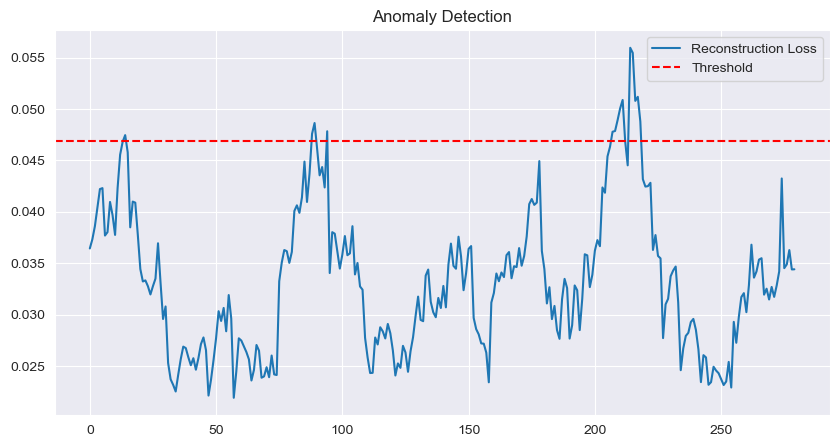

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(loss, label='Reconstruction Loss')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Anomaly Detection')
plt.legend()
plt.show()

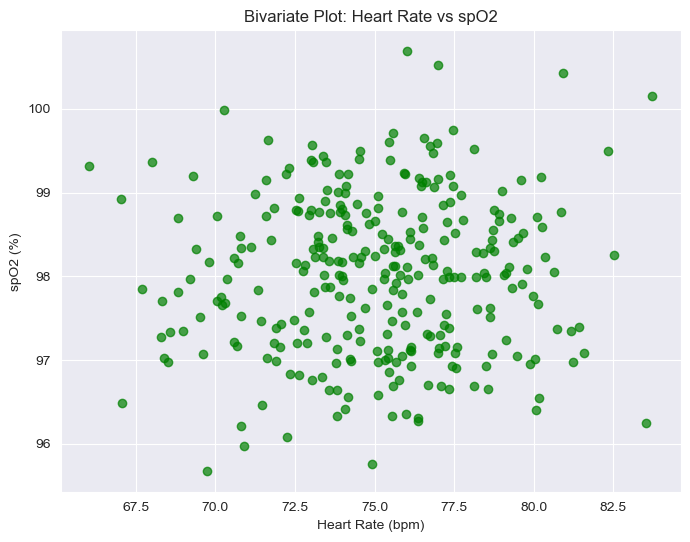

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(data['heart_rate'], data['spO2'], alpha=0.7, c='green')
plt.title('Bivariate Plot: Heart Rate vs spO2')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('spO2 (%)')
plt.grid(True)
plt.show()

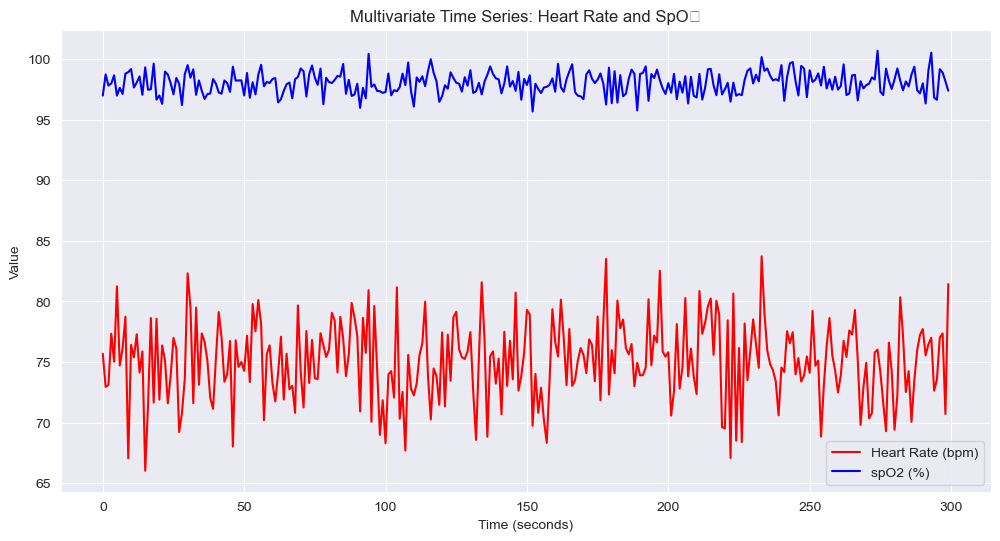

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['heart_rate'], label='Heart Rate (bpm)', color='red')
plt.plot(data['time'], data['spO2'], label='spO2 (%)', color='blue')
plt.title('Multivariate Time Series: Heart Rate and SpO₂')
plt.xlabel('Time (seconds)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]
converter._experimental_lower_tensor_list_ops = False


In [45]:
converter._experimental_enable_resource_variables = True

In [47]:
import tensorflow as tf

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Tell TFLite to allow TensorFlow ops and avoid lowering unsupported ops
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS  # This line is very important for LSTM
]
converter._experimental_lower_tensor_list_ops = False

# OPTIONAL: Allow resource variables if needed
converter._experimental_enable_resource_variables = True

try:
    tflite_model = converter.convert()
    with open("health_monitor_model.tflite", "wb") as f:
        f.write(tflite_model)
    print("✅ Model successfully converted to TFLite")
except Exception as e:
    print("❌ TFLite conversion failed:")
    print(e)


INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmp_tv_ta4w\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmp_tv_ta4w\assets


Saved artifact at 'C:\Users\Admin\AppData\Local\Temp\tmp_tv_ta4w'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 20, 2), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 20, 2), dtype=tf.float32, name=None)
Captures:
  2387165552976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387165554320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387165554128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387165555472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387165556048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387165554704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387165556432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387165555664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387165554512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387165553168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387165

In [48]:
import numpy as np
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="health_monitor_model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test on one sample
input_data = X[0:1].astype(np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
print("Reconstructed sample output:", output_data)


Reconstructed sample output: [[[0.4474003  0.41590416]
  [0.51938826 0.48059276]
  [0.5214509  0.47576824]
  [0.50503826 0.4513662 ]
  [0.49910384 0.44073373]
  [0.50129604 0.44149938]
  [0.50700533 0.4476367 ]
  [0.51272106 0.45442757]
  [0.5169734  0.4597301 ]
  [0.5194649  0.4630252 ]
  [0.52043253 0.46453467]
  [0.52026254 0.46469966]
  [0.51932317 0.4639488 ]
  [0.5179106  0.46262398]
  [0.51624274 0.4609735 ]
  [0.5144711  0.45916826]
  [0.51269615 0.45732132]
  [0.5109818  0.4555049 ]
  [0.5093654  0.45376426]
  [0.50786674 0.45212495]]]


In [50]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="health_monitor_model.tflite")
interpreter.allocate_tensors()



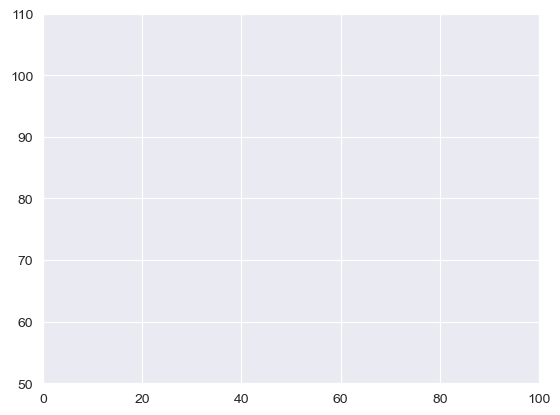

In [51]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

def init():
    ax.set_xlim(0, 100)
    ax.set_ylim(50, 110)
    return line,

def update(frame):
    # Replace with real-time sensor data or simulation
    y = np.random.normal(75, 5)
    xdata.append(frame)
    ydata.append(y)
    line.set_data(xdata[-100:], ydata[-100:])
    return line,

xdata, ydata = [], []
ani = animation.FuncAnimation(fig, update, frames=range(200), init_func=init, blit=True)
plt.show()


In [52]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [53]:
import streamlit as st
import pandas as pd
import numpy as np

st.title("💓 Real-Time Heart Monitoring")

# Simulate input
if st.button("Get Latest Vitals"):
    heart = np.random.normal(75, 5)
    spo2 = np.random.normal(98, 1)
    st.metric("Heart Rate", f"{heart:.1f} bpm")
    st.metric("SpO₂", f"{spo2:.1f} %")


2025-07-01 22:38:11.327 
  command:

    streamlit run C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [54]:
import streamlit as st
import numpy as np

st.set_page_config(page_title="Heart Monitor", layout="centered")

st.title("💓 Real-Time Heart Health Monitor")

if st.button("Get Latest Vitals"):
    heart = np.random.normal(75, 5)
    spo2 = np.random.normal(98, 1)
    
    st.metric("Heart Rate", f"{heart:.1f} bpm")
    st.metric("SpO₂ Level", f"{spo2:.1f} %")
    
    st.success("Vitals fetched successfully!")


In [2]:
import os
import pickle
from sklearn.ensemble import IsolationForest

# Create the folder if it doesn't exist
os.makedirs('model', exist_ok=True)

# Dummy model
model = IsolationForest()
model.fit([[0], [0.44], [0.45], [0.46]])

# Save as .pkl
with open('model/if_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model saved as model/if_model.pkl")


✅ Model saved as model/if_model.pkl


In [3]:
import pickle
import numpy as np

# Load the saved model
with open('model/if_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Use it for prediction
sample = np.array([[78]])
result = loaded_model.predict(sample)

print("Prediction:", result)
# Output: [1] (normal) or [-1] (anomaly)


Prediction: [1]
